# Supervised Learning Coding Worksheet

## Part 1 - Regression

- Diabetes Dataset
- Linear Regression

### 1

Load the diabetes dataset.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

### 2

Split the data into training and testing sets (80/20).

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 3

Train a LinearRegression model.

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4

Compute MSE, MAE, R2 Score

In [4]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

Model Evaluation Results:
Mean Squared Error (MSE): 2900.19
Mean Absolute Error (MAE): 42.79
R^2 Score: 0.4526


### 5

Interpret the results.

In [6]:
print("\nInterpretation:")
print(f"- The model explains approximately {r2*100:.2f}% of the variance in the target variable.")
print("- Higher MSE and MAE indicate worse prediction accuracy.")


Interpretation:
- The model explains approximately 45.26% of the variance in the target variable.
- Higher MSE and MAE indicate worse prediction accuracy.


## Part 2 - Classification

- Breast Cancer Dataset
- Logistic Regression

### 1

Load dataset.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

### 2

Train a LogisticRegression model.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 3

Compute Accuracy, Confusion Matrix, Classification Report, Log Loss (Cross Entropy)

Model Evaluation Results:

Accuracy: 0.9561

Confusion Matrix:
 [[39  4]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Log Loss: 0.0799


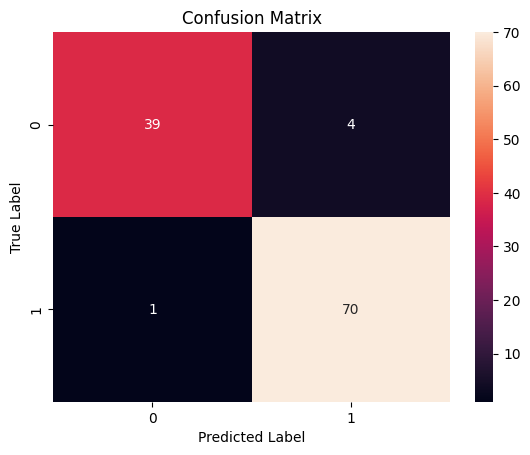

In [9]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

print("Model Evaluation Results:\n")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
print(f"Log Loss: {logloss:.4f}")

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### 4

Interpret the Confusion Matrix

In [10]:
print("\nInterpretation:")
print("- Accuracy shows overall percentage of correct predictions.")
print("- Confusion Matrix shows correct and incorrect classifications.")
print("- High precision and recall indicate good model performance.")
print("- Lower log loss indicates better probability predictions.")


Interpretation:
- Accuracy shows overall percentage of correct predictions.
- Confusion Matrix shows correct and incorrect classifications.
- High precision and recall indicate good model performance.
- Lower log loss indicates better probability predictions.


## Part 3 - K-Nearest Neighbours

- Iris Dataset
- KNN Classification

### 1

Train a KNeighborsClassifier.

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 2

Evaluate Performance for - k = 1, 5, 15, 30

In [12]:
k_values = [1, 5, 15, 30]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

k = 1, Accuracy = 1.0000
k = 5, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 30, Accuracy = 1.0000


### 3

Plot Accuracy vs k

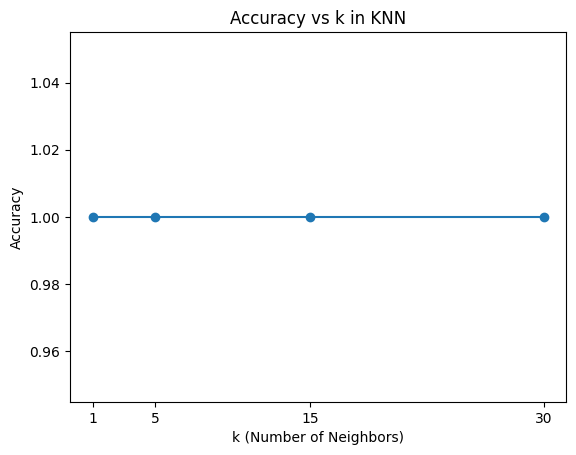

In [13]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k in KNN")
plt.xticks(k_values)
plt.show()

### 4

Explain underfitting and overfitting behavior.

In [14]:
print("\nExplanation:")
print("• Small k (e.g., k=1) may lead to overfitting (high variance).")
print("• Large k (e.g., k=30) may lead to underfitting (high bias).")
print("• A moderate k often provides the best balance between bias and variance.")


Explanation:
• Small k (e.g., k=1) may lead to overfitting (high variance).
• Large k (e.g., k=30) may lead to underfitting (high bias).
• A moderate k often provides the best balance between bias and variance.


## Part 4 - Gradient Descent (Using Built-in Solvers)

- SGD Regressor
- SGD Classifier

### 1

- Use the diabetes dataset.
- Train SGDRegressor
- Compare its performance with LinearRegression
- Experiment with different learning rates.
- Plot training loss curve.

=== Linear Regression (Diabetes) ===
MSE: 2900.19
MAE: 42.79
R^2: 0.4526

=== SGDRegressor (Diabetes) Results ===
eta0=0.0001 -> MSE: 2887.41, MAE: 42.85, R^2: 0.4550
eta0=0.001  -> MSE: 2896.52, MAE: 42.85, R^2: 0.4533
eta0=0.01   -> MSE: 3066.04, MAE: 43.63, R^2: 0.4213
eta0=0.1    -> MSE: 12777.51, MAE: 93.14, R^2: -1.4117


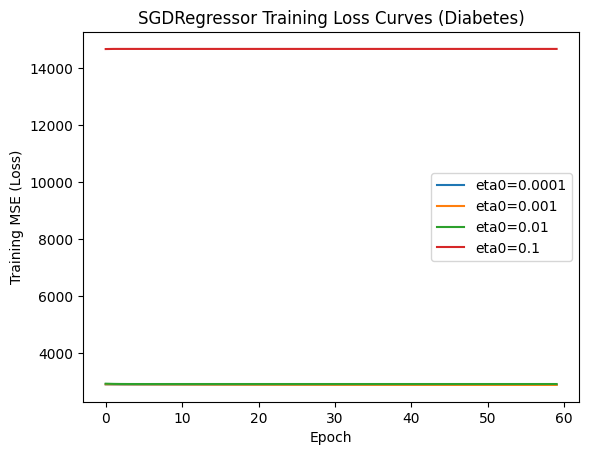


Notes:
- If learning rate is too small, training improves slowly.
- If learning rate is too large, training may be unstable or worse.
- LinearRegression finds the best solution directly (closed-form). SGD approximates it iteratively.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression (Diabetes) ===")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R^2: {r2_lr:.4f}")
print()

learning_rates = [0.0001, 0.001, 0.01, 0.1]
sgd_results = {}
loss_curves = {}

for lr in learning_rates:
    sgd_reg = SGDRegressor(
        loss="squared_error",
        learning_rate="constant",
        eta0=lr,
        max_iter=2000,
        tol=1e-6,
        random_state=42,
        penalty=None,
        warm_start=True
    )

    epochs = 60
    train_mse_per_epoch = []

    for _ in range(epochs):
        sgd_reg.fit(X_train_scaled, y_train)
        y_train_pred = sgd_reg.predict(X_train_scaled)
        train_mse_per_epoch.append(mean_squared_error(y_train, y_train_pred))

    y_pred_sgd = sgd_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred_sgd)
    mae = mean_absolute_error(y_test, y_pred_sgd)
    r2 = r2_score(y_test, y_pred_sgd)

    sgd_results[lr] = (mse, mae, r2)
    loss_curves[lr] = train_mse_per_epoch

print("=== SGDRegressor (Diabetes) Results ===")
for lr in learning_rates:
    mse, mae, r2 = sgd_results[lr]
    print(f"eta0={lr:<6} -> MSE: {mse:.2f}, MAE: {mae:.2f}, R^2: {r2:.4f}")

plt.figure()
for lr in learning_rates:
    plt.plot(loss_curves[lr], label=f"eta0={lr}")
plt.xlabel("Epoch")
plt.ylabel("Training MSE (Loss)")
plt.title("SGDRegressor Training Loss Curves (Diabetes)")
plt.legend()
plt.show()

print("\nNotes:")
print("- If learning rate is too small, training improves slowly.")
print("- If learning rate is too large, training may be unstable or worse.")
print("- LinearRegression finds the best solution directly (closed-form). SGD approximates it iteratively.")

### 2

- Use the breast cancer dataset.
- Train SGDClassifier
- Compare performance with LogisticRegression
- Explain how SGD relates to Gradient Descent

In [16]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
ll_lr = log_loss(y_test, y_prob_lr)

print("=== Logistic Regression (Breast Cancer) ===")
print(f"Accuracy: {acc_lr:.4f}")
print("Confusion Matrix:\n", cm_lr)
print("Classification Report:\n", report_lr)
print(f"Log Loss: {ll_lr:.4f}")
print()

sgd_clf = SGDClassifier(
    loss="log_loss",
    max_iter=5000,
    tol=1e-4,
    random_state=42
)
sgd_clf.fit(X_train_scaled, y_train)

y_pred_sgd = sgd_clf.predict(X_test_scaled)
y_prob_sgd = sgd_clf.predict_proba(X_test_scaled)

acc_sgd = accuracy_score(y_test, y_pred_sgd)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd)
ll_sgd = log_loss(y_test, y_prob_sgd)

print("=== SGDClassifier (Breast Cancer) ===")
print(f"Accuracy: {acc_sgd:.4f}")
print("Confusion Matrix:\n", cm_sgd)
print("Classification Report:\n", report_sgd)
print(f"Log Loss: {ll_sgd:.4f}")
print()

print("Explanation (How SGD relates to Gradient Descent):")
print("- Gradient Descent updates model weights to reduce loss using the gradient of the loss function.")
print("- Batch Gradient Descent uses the FULL dataset to compute each update (slower per step).")
print("- Stochastic Gradient Descent (SGD) uses ONE sample (or a small mini-batch) per update.")
print("- SGD is faster and scales well to large datasets, but updates are noisier.")

=== Logistic Regression (Breast Cancer) ===
Accuracy: 0.9825
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Log Loss: 0.0777

=== SGDClassifier (Breast Cancer) ===
Accuracy: 0.9737
Confusion Matrix:
 [[41  1]
 [ 2 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Log Loss: 0.2122

Explanation (How SGD relates to Gradient Descent):
- Gradient Descent 